### Проект 4 [Стоимость мобильного телефона]

Вам предоставляется набор данных. Набор данных уже разделен на ```train_data.csv``` и ```test_data.csv```.

**Цель:** построить модели для прогнозирования **диапазона цен** на мобильные телефоны. (```"price_range"```).

    > 0 (низкая цена)
    > 1 (средняя цена)
    > 2 (высокая цена)
    > 3 (очень высокая цена)

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик классификации: ```F-score```, ```Precision```, ```Recall```.

**Примечание:** вам **рекомендуется** искать так же другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test_data.csv```.

In [1]:
# Начало кода
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Конец кода

In [2]:
#загружаем тестовую и тренировочную выборки.
data_train = pd.read_csv('./train_data-pr4.csv')
data_test  = pd.read_csv('./test_data-pr4.csv')

In [3]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1938,1,0.5,1,5,0,44,0.5,121,2,...,1299,1935,3497,18,10,18,0,1,0,3
1,1831,0,1.4,1,2,0,43,0.9,150,5,...,611,1381,3834,17,7,13,1,1,1,3
2,763,0,1.7,1,8,1,2,0.5,92,8,...,1028,1186,1050,6,4,8,1,1,0,0
3,851,0,0.5,0,3,0,21,0.4,200,5,...,1171,1263,478,12,7,10,1,0,1,0
4,712,0,0.5,0,6,0,27,0.5,86,2,...,1245,1309,2001,11,10,12,1,1,1,1


In [4]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1701,1,1.6,1,3,0,10,0.3,194,8,...,550,1338,2598,12,9,6,0,1,0,2
1,1484,0,3.0,0,3,0,12,0.6,134,3,...,916,969,1457,14,4,20,1,1,0,1
2,555,1,0.5,1,2,0,17,0.2,163,5,...,956,1010,343,19,14,3,0,1,1,0
3,586,0,2.8,0,2,0,15,0.2,83,3,...,241,854,2592,12,8,3,0,0,0,1
4,980,1,0.5,0,0,1,33,0.9,160,6,...,1008,1758,2268,7,5,4,1,1,0,2


In [5]:
print('Train set shape ->', data_train.shape)
print('Test set shape ->', data_test.shape)

Train set shape -> (1800, 21)
Test set shape -> (200, 21)


In [6]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,1800.0,1237.533333,440.853947,501.0,848.00,1224.5,1617.00,1998.0
blue,1800.0,0.499444,0.500139,0.0,0.00,0.0,1.00,1.0
clock_speed,1800.0,1.517944,0.813604,0.5,0.70,1.5,2.20,3.0
dual_sim,1800.0,0.509444,0.500050,0.0,0.00,1.0,1.00,1.0
fc,1800.0,4.342778,4.331555,0.0,1.00,3.0,7.00,19.0
four_g,1800.0,0.525000,0.499513,0.0,0.00,1.0,1.00,1.0
int_memory,1800.0,32.197222,18.192214,2.0,16.00,32.0,48.00,64.0
m_dep,1800.0,0.502778,0.289281,0.1,0.20,0.5,0.80,1.0
mobile_wt,1800.0,140.413889,35.407189,80.0,109.00,141.0,170.25,200.0
n_cores,1800.0,4.523333,2.289379,1.0,3.00,5.0,7.00,8.0


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1800 non-null   int64  
 1   blue           1800 non-null   int64  
 2   clock_speed    1800 non-null   float64
 3   dual_sim       1800 non-null   int64  
 4   fc             1800 non-null   int64  
 5   four_g         1800 non-null   int64  
 6   int_memory     1800 non-null   int64  
 7   m_dep          1800 non-null   float64
 8   mobile_wt      1800 non-null   int64  
 9   n_cores        1800 non-null   int64  
 10  pc             1800 non-null   int64  
 11  px_height      1800 non-null   int64  
 12  px_width       1800 non-null   int64  
 13  ram            1800 non-null   int64  
 14  sc_h           1800 non-null   int64  
 15  sc_w           1800 non-null   int64  
 16  talk_time      1800 non-null   int64  
 17  three_g        1800 non-null   int64  
 18  touch_sc

In [8]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

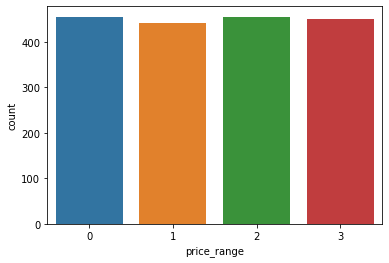

In [9]:
#категории ценового диапазона
sns.countplot(x = 'price_range' , data = data_train)
plt.show()

In [10]:
import pandas as pd
  
#объединение двух csv-файлов, с целью визуализации
data = pd.concat(map(pd.read_csv, ['train_data-pr4.csv', 'test_data-pr4.csv']), ignore_index=True)
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0              1938     1          0.5         1   5       0          44   
1              1831     0          1.4         1   2       0          43   
2               763     0          1.7         1   8       1           2   
3               851     0          0.5         0   3       0          21   
4               712     0          0.5         0   6       0          27   
...             ...   ...          ...       ...  ..     ...         ...   
1995           1604     0          1.2         0   1       0           6   
1996           1084     1          2.6         0   3       1          40   
1997           1579     1          0.5         1   0       0           5   
1998            962     0          1.0         1  14       0           2   
1999            553     1          2.2         1   0       1          18   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

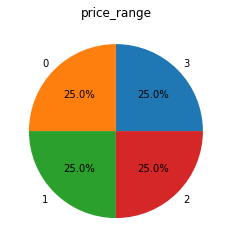

In [105]:
#определяем, сбалансированы ли данные или нет, с помощью круговой диаграммы
plt.pie(data['price_range'].value_counts().values,labels=data['price_range'].unique(),autopct='%1.1f%%')
plt.title('price_range')
plt.show()

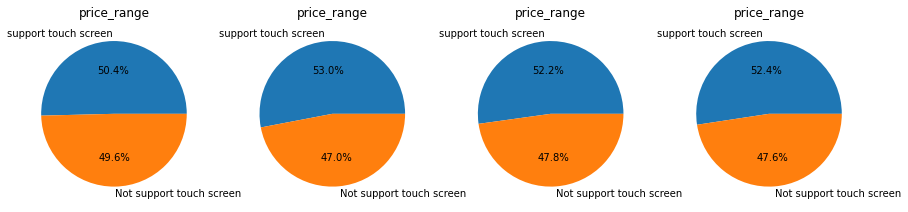

In [108]:
def newcircle(data,lab,title,fig=1):
    plt.subplot(1,4,fig)
    plt.pie(data.value_counts(),labels=lab,autopct='%1.1f%%')
    plt.title(title)
#как доступность сенсорного экрана влияет на цену в каждой категории
plt.figure(figsize=(15,15))
newcircle(data.loc[data['price_range']==3,'touch_screen'],['support touch screen','Not support touch screen'],'price_range',1)
newcircle(data.loc[data['price_range']==2,'touch_screen'],['support touch screen','Not support touch screen'],'price_range',2)
newcircle(data.loc[data['price_range']==1,'touch_screen'],['support touch screen','Not support touch screen'],'price_range',3)
newcircle(data.loc[data['price_range']==0,'touch_screen'],['support touch screen','Not support touch screen'],'price_range',4)

In [109]:
data[['touch_screen','price_range']].groupby(['price_range']).mean()

,touch_screen
price_range,
0,0.524
1,0.522
2,0.470
3,0.496


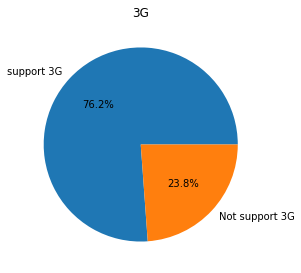

In [110]:
#количество аппаратов, поддерживающих 3G
plt.figure(figsize=(20,20))
newcircle(data['three_g'],['support 3G','Not support 3G'],'3G')

In [88]:
X=data.drop('price_range',axis=1)

In [89]:
y=data['price_range'] #то что нужно предсказать.

In [90]:
#определение обучающих и тестовых данных (со следующим соотношением 8-2).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [91]:
#Импорт модели опорных векторов (SVM).
from sklearn.svm import SVC

In [92]:
svc_model=SVC()

In [93]:
#обучение модели
svc_model.fit(X_train, y_train)

SVC()

In [94]:
#прогноз с использованием тестовых данных.
y_predict=svc_model.predict(X_test)

In [95]:
#проверка точности прогноза при помощи confusion_matrix.
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
#Сравнение моделей на основе метрик классификации: F-score, Precision, Recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.89      0.93      0.91       107
           2       0.93      0.84      0.89        96
           3       0.94      0.96      0.95        95

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [101]:
abc=np.array(confusion_matrix(y_test, y_predict))
confusion=pd.DataFrame(abc, index=['low price', 'medium price', 'high price', 'very high price'],
                      columns=['precision', 'recall', 'f1-score', 'support'])

<AxesSubplot:>

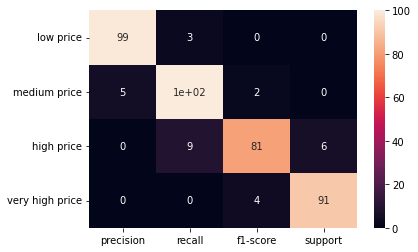

In [102]:
#визуализация на тепловой карте.
sns.heatmap(confusion, annot=True)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [98]:
##Точность модели составляет 92-93%.
accuracy_score(y_predict, y_test)

0.9275